# Advanced Statistics for Physics- RLab02

### Student 
Luca Menti

### ID
2063594

### e-mail
luca.menti@studenti.unipd.it

### Course
Physics of Data




# EXERCISE 1

## 1)Valuate the expected values, $E[X]$, and the variance, $Var(X)$, for both methods

x,p1,p2
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


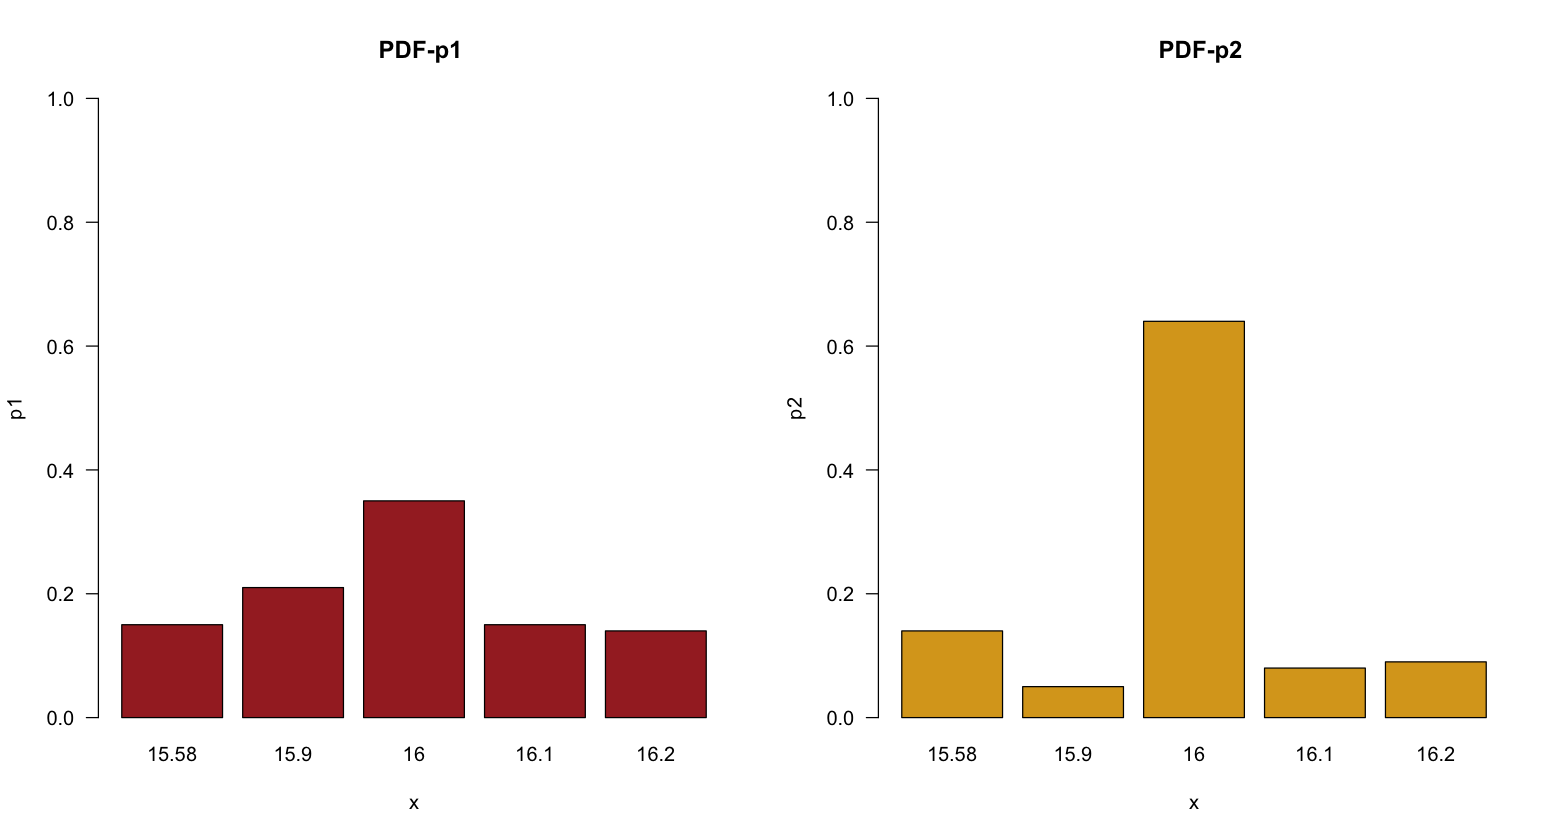

In [635]:
#usefull library
library(readr)
library (curl)
library(lubridate)
library(tidyr)
library(dplyr)
library(ggplot2)

#create vectors  with values given by the exercise
x<- c(15.58,15.9,16,16.1,16.2)
p1<- c(0.15,0.21,0.35,0.15,0.14)
p2<- c(0.14,0.05,0.64,0.08,0.09)

#create a df with values given by the exercise
df<-data.frame(x,p1,p2)
df

#plot pdf for the 2
options(repr.plot.width=13, repr.plot.height=7)
par(mfrow=c(1,2))



barplot(df$p1,
        col="brown",
        border="black",
        names.arg=x,
        xlab=" x ",
        ylab="p1",
        ylim=c(0,1),
        las=1,
        main="  PDF-p1")

barplot(df$p2,
        col="goldenrod",
        border="black",
        names.arg=x,
        xlab=" x ",
        ylab="p2",
        ylim=c(0,1),
        las=1,
        main="  PDF-p2")



### The expected value for p1-set is

In [636]:
print(paste0("the expected value considering x values without p1 is:"," ", mean(df$x)))

print(paste0("the expected value considering x valurd with p1 is:"," ", sum(df$x*df$p1)))

[1] "the expected value considering x values without p1 is: 15.956"
[1] "the expected value considering x valurd with p1 is: 15.959"


### The expected value for p2-set is

In [637]:
print(paste0("the expected value considering x values without p2 is:"," ", mean(df$x)))

print(paste0("the expected value considering x values with p2 is:"," ", sum(df$x*df$p2)))

[1] "the expected value considering x values without p2 is: 15.956"
[1] "the expected value considering x values with p2 is: 15.9622"


### The Var(x) for p1-set is


In [638]:
#vector with variance for p1
varp1<- round(sum((df$x)^2*df$p1)-sum(df$x*df$p1)^2,3)
print(paste0("the variance for p1 is:"," ", varp1))

[1] "the variance for p1 is: 0.034"


### The Var(x) for p2-set is

In [639]:
#vector with variance for p2 
varp2<- round(sum((df$x)^2*df$p2)-sum(df$x*df$p2)^2,3)
print(paste0("the variance for p2 is:"," ", varp2))

[1] "the variance for p2 is: 0.028"


# EXERCISE 2

## The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate $ \lambda$= $\frac{1}{30}$.


## 1) Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

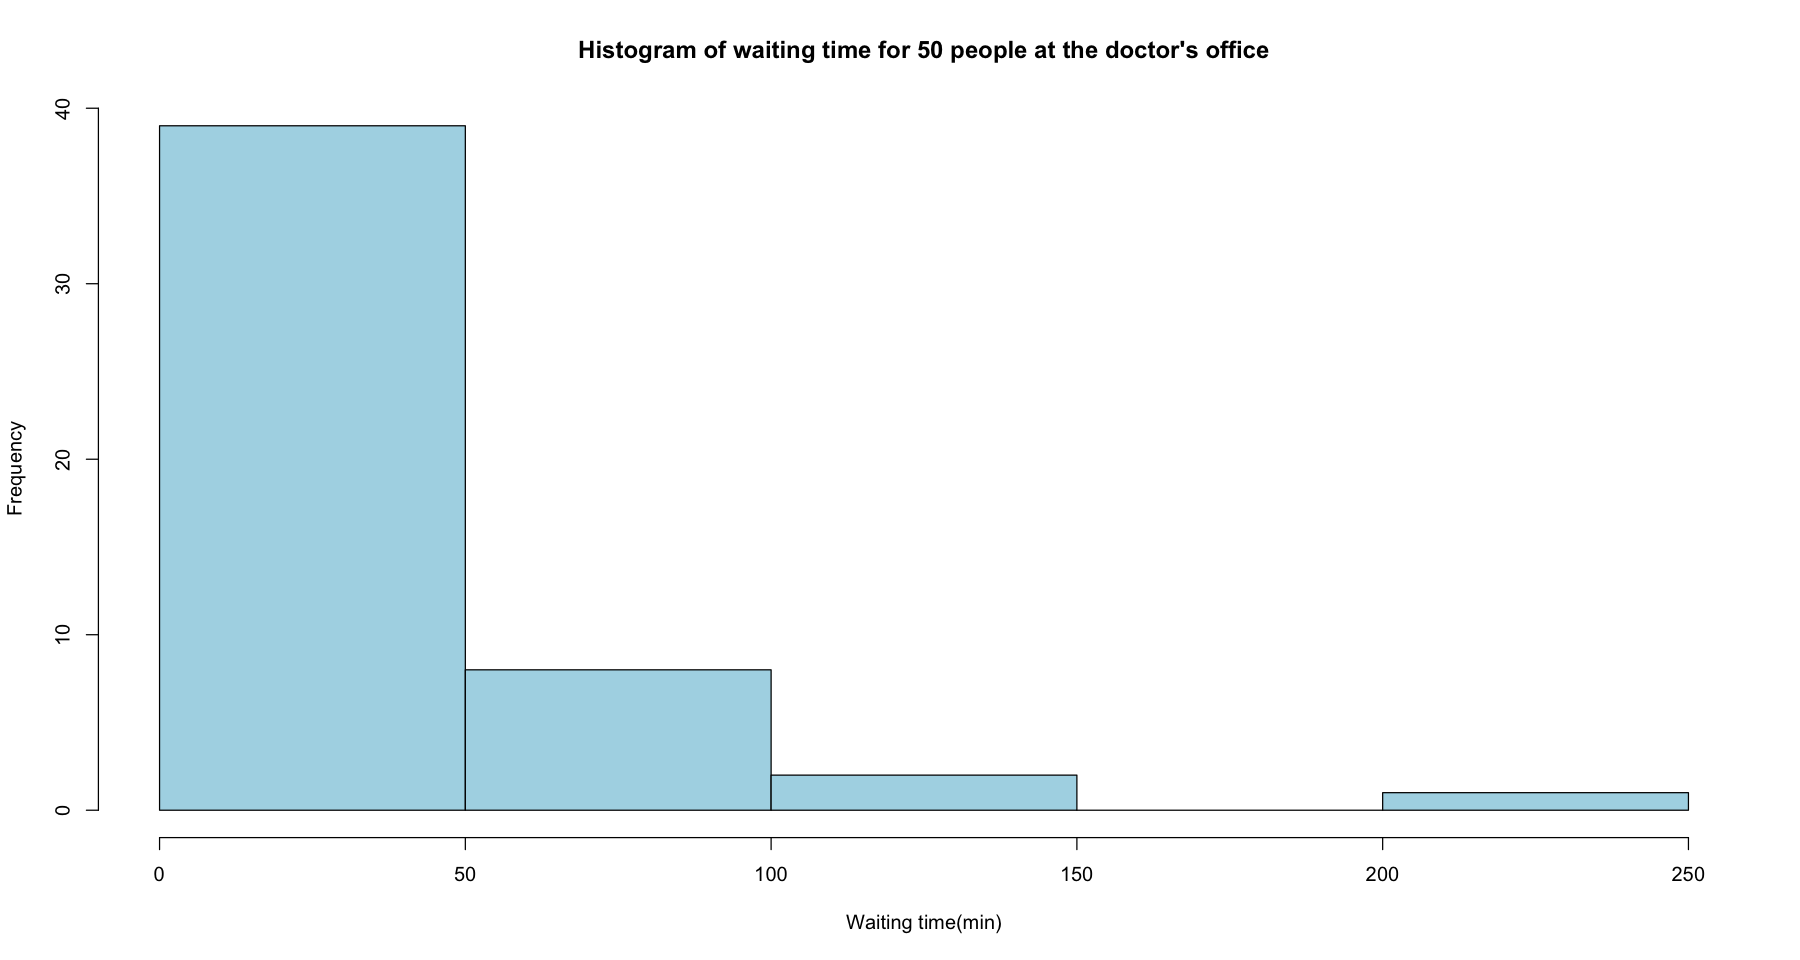

In [662]:
#generate vector with simulated values (exp.distribution)

lamda=1/30

waits<- rexp(50,lamda)


#plot histogram
options(repr.plot.width=15, repr.plot.height=8) 
hist(waits,col="lightblue",main="Histogram of waiting time for 50 people at the doctor's office",xlab="Waiting time(min)",breaks=5)

## 2) What is the probability that a person will wait for less than 10 minutes ?

In [664]:
#theoretical
print(paste0("the probability (theoretical) is:", " ", round(pexp(10, rate=1/30)*100,2),"%"))

#vector with R simulation probability
waitsless10min<- 1-length(waits[ waits >10])/length(waits)

#R simulation
print(paste0("the probability (R simulation) is:", " ", round(waitsless10min*100,2),"%"))

[1] "the probability (theoretical) is: 28.35%"
[1] "the probability (R simulation) is: 30%"


## 3) Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [665]:
#vector with avarage time R simulation
averagewaiting<-sum(waits)/length(waits)
lamda=1/30
#R simulation
print(paste0("the average waiting time from the simulated data is:", " ", round(averagewaiting,0)," " , "minutes"))

#theoretical
print(paste0("the average waiting time from the theory is:", " ", round(1/lamda,0)," " , "minutes"))

#theoretical using R Integration
print(paste0("the average waiting time from the theory using R integration is:", " ", round(integrate(function (x){x*dexp(x,lamda)},0, Inf)$value,0)," " , "minutes"))

[1] "the average waiting time from the simulated data is: 33 minutes"
[1] "the average waiting time from the theory is: 30 minutes"
[1] "the average waiting time from the theory using R integration is: 30 minutes"


## 4)What is the probability for waiting more than one hour before being received ?

In [666]:
#theoretical
print(paste0(  "the probability (theoretical) is:", " ", round((1-pexp(60, rate=1/30))*100,2),"%" ))

#vector with R simulation probability
waitsmore1h<- length(waits[ waits >60])/length(waits)

#R simulation
print(paste0("the probability (R simulation) is:", " ", round(waitsmore1h*100,2),"%"))

[1] "the probability (theoretical) is: 13.53%"
[1] "the probability (R simulation) is: 18%"


# EXERCISE 3

## Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book.

## 1) If the number of errors follows a Poisson distribution plot the pdf and cdf 

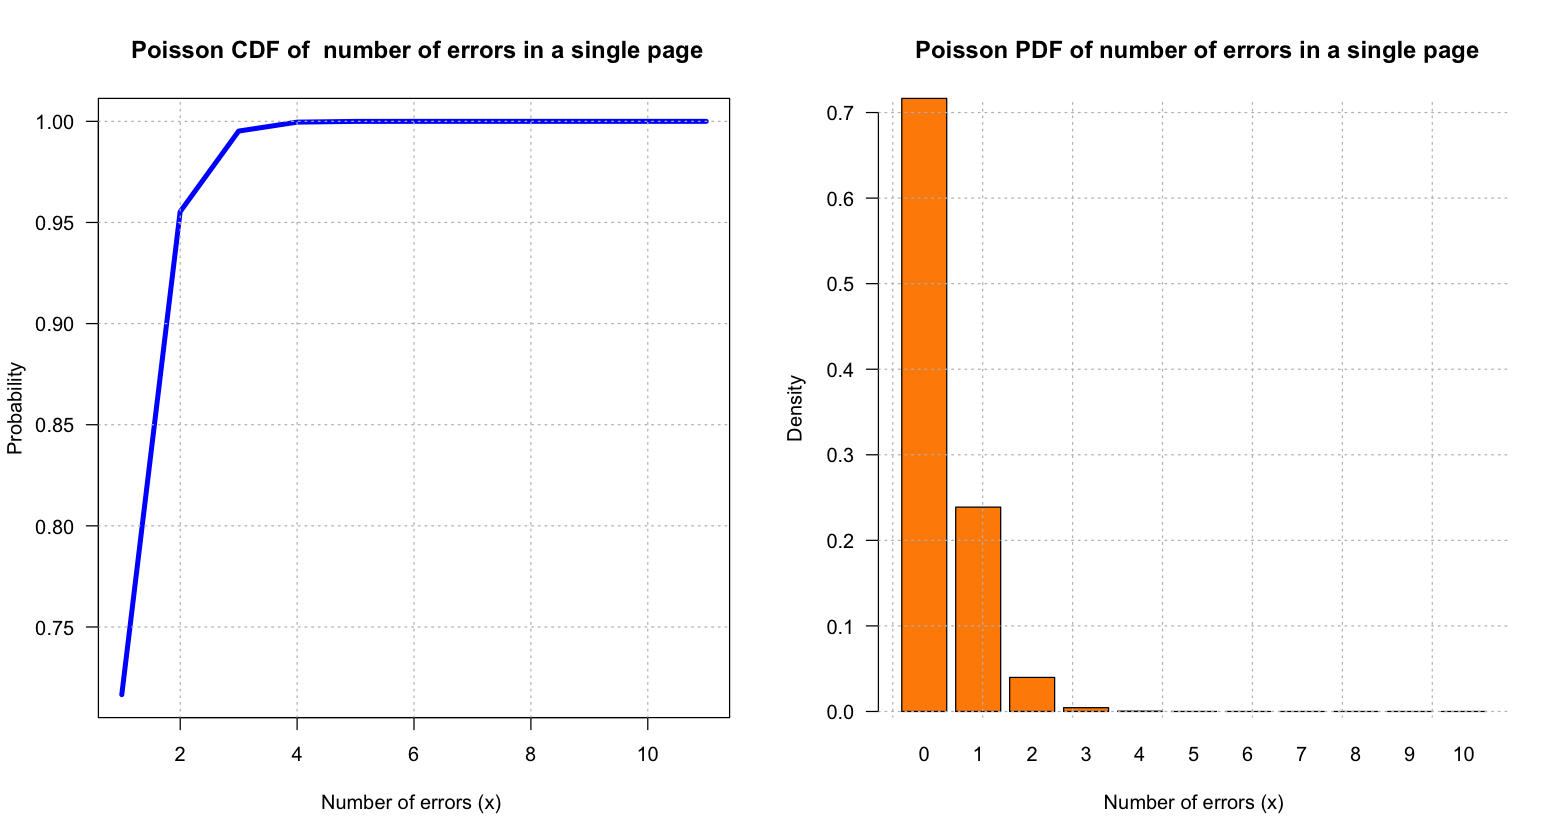

In [667]:
#number of pages
pag<- c(0:10)
lamda=1/3

#poisson cdf
p<- ppois(q = pag, lamda, lower.tail = T) 

#poisson pdf
d<- dpois(x = pag,lamda)


#plot pdf 
options(repr.plot.width=13, repr.plot.height=7)
par(mfrow=c(1,2))
plot(p,
       type="l",
       col="blue",
       lwd=4,
       xlab="Number of errors (x) ",
       ylab="Probability",
       las=1,
       main=" Poisson CDF of  number of errors in a single page")


grid(nx=NULL, ny=NULL, lty=3, col="gray",lwd=1) #grid


#barplot cdf 
barplot(d,
        col="Darkorange",
        border="black",
        names.arg=pag,
        xlab=" Number of errors (x) ",
        ylab="Density",
        las=1,
        main=" Poisson PDF of number of errors in a single page")

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

### Pdf vs Cdf

It' s good to underline that PDF and CDF have two differents y-axises that's why I plotted PDF vs CDF with 2 differents y-axises. In particular on the left there's CDF's y-axis while on the right there's PDF's y-axis. If you don't underline this difference the plot CDF VS PDF wouldn't make any sense.

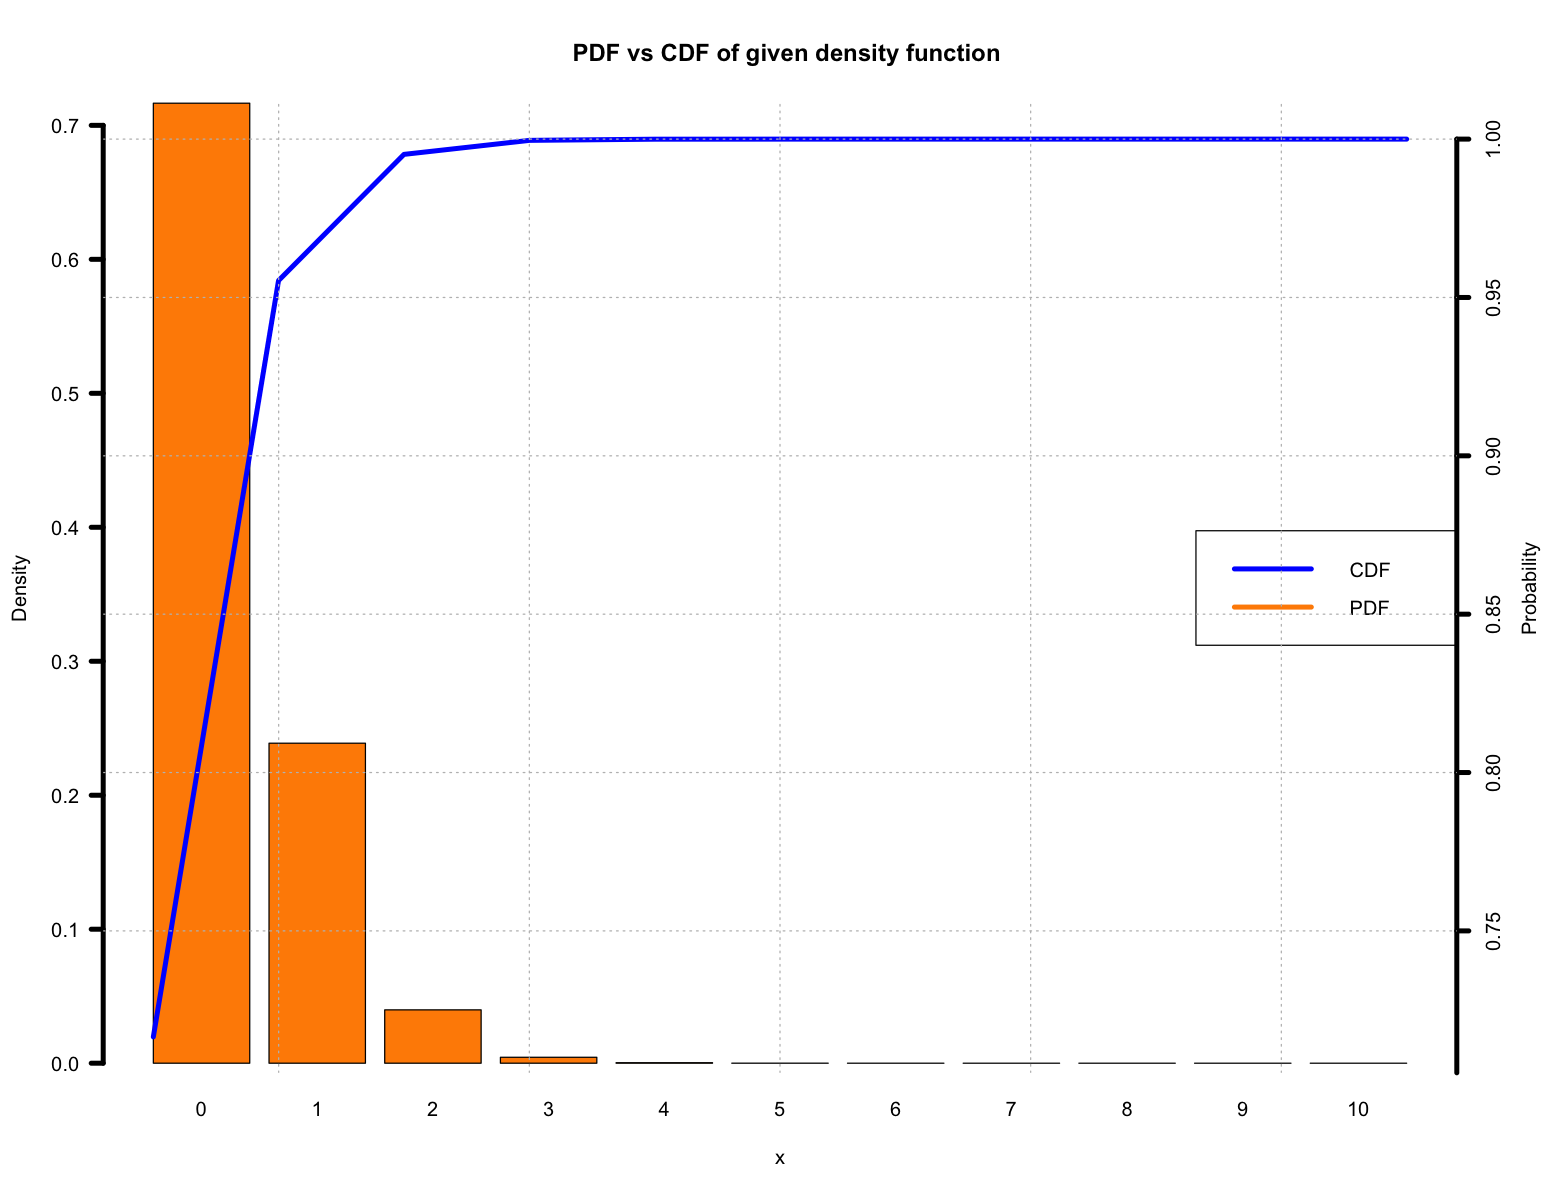

In [668]:
#plot Cdf vs Pdf 
options(repr.plot.width=13, repr.plot.height=10)

par(mar= c(5,4,4,4)+0.3)

barplot(d, 
        col="darkorange", 
        las=1,
        lwd=4,
        xlab=" ",
        ylab="Density",
        names.arg=pag)
                      
par(new=TRUE)
 
plot(p, 
     type="l",
     col="blue", 
     las=1,
     lwd=4,
     xlab="x",
     ylab="",
     axes=FALSE,
     main="  PDF vs CDF of given density function")

par(new=TRUE)

axis(side=4,at=pretty(range(p)),lwd=4)

mtext("Probability",side=4,line=2.5)

#legend
legend(x = "right",
      col = c("blue", "darkorange"),
      lty = 1,
      lwd = 4,
      legend = c('CDF', 'PDF')) 
#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 2) Calculate the probability that there is at least one error on a specific page of the book

In [669]:
print(paste0("the probability that there is at least one error on a specific page of the book  is:", " ", round((1-dpois(0,1/3))*100,2),"%"))

[1] "the probability that there is at least one error on a specific page of the book  is: 28.35%"


# EXERCISE 4

## We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

We can assume that the geometric discrete probability distribution applies to this case. 
So the probability is given by: 1 minus the cumulative distribution of that 9 draws are needed.

In particular $p$= $\frac{number\ of\ aces}{number \ of \ cards}$= $\frac{4}{52}$

In [670]:
p = 4/52
n = 9 #number of failures 

#vector with probability
tendraws<- 1-pgeom(q = n, prob = p, lower.tail = TRUE)

print(paste0("the probability that the probability that at least 10 draws are needed  is:", " ", round(tendraws*100,2),"%"))

[1] "the probability that the probability that at least 10 draws are needed  is: 44.91%"


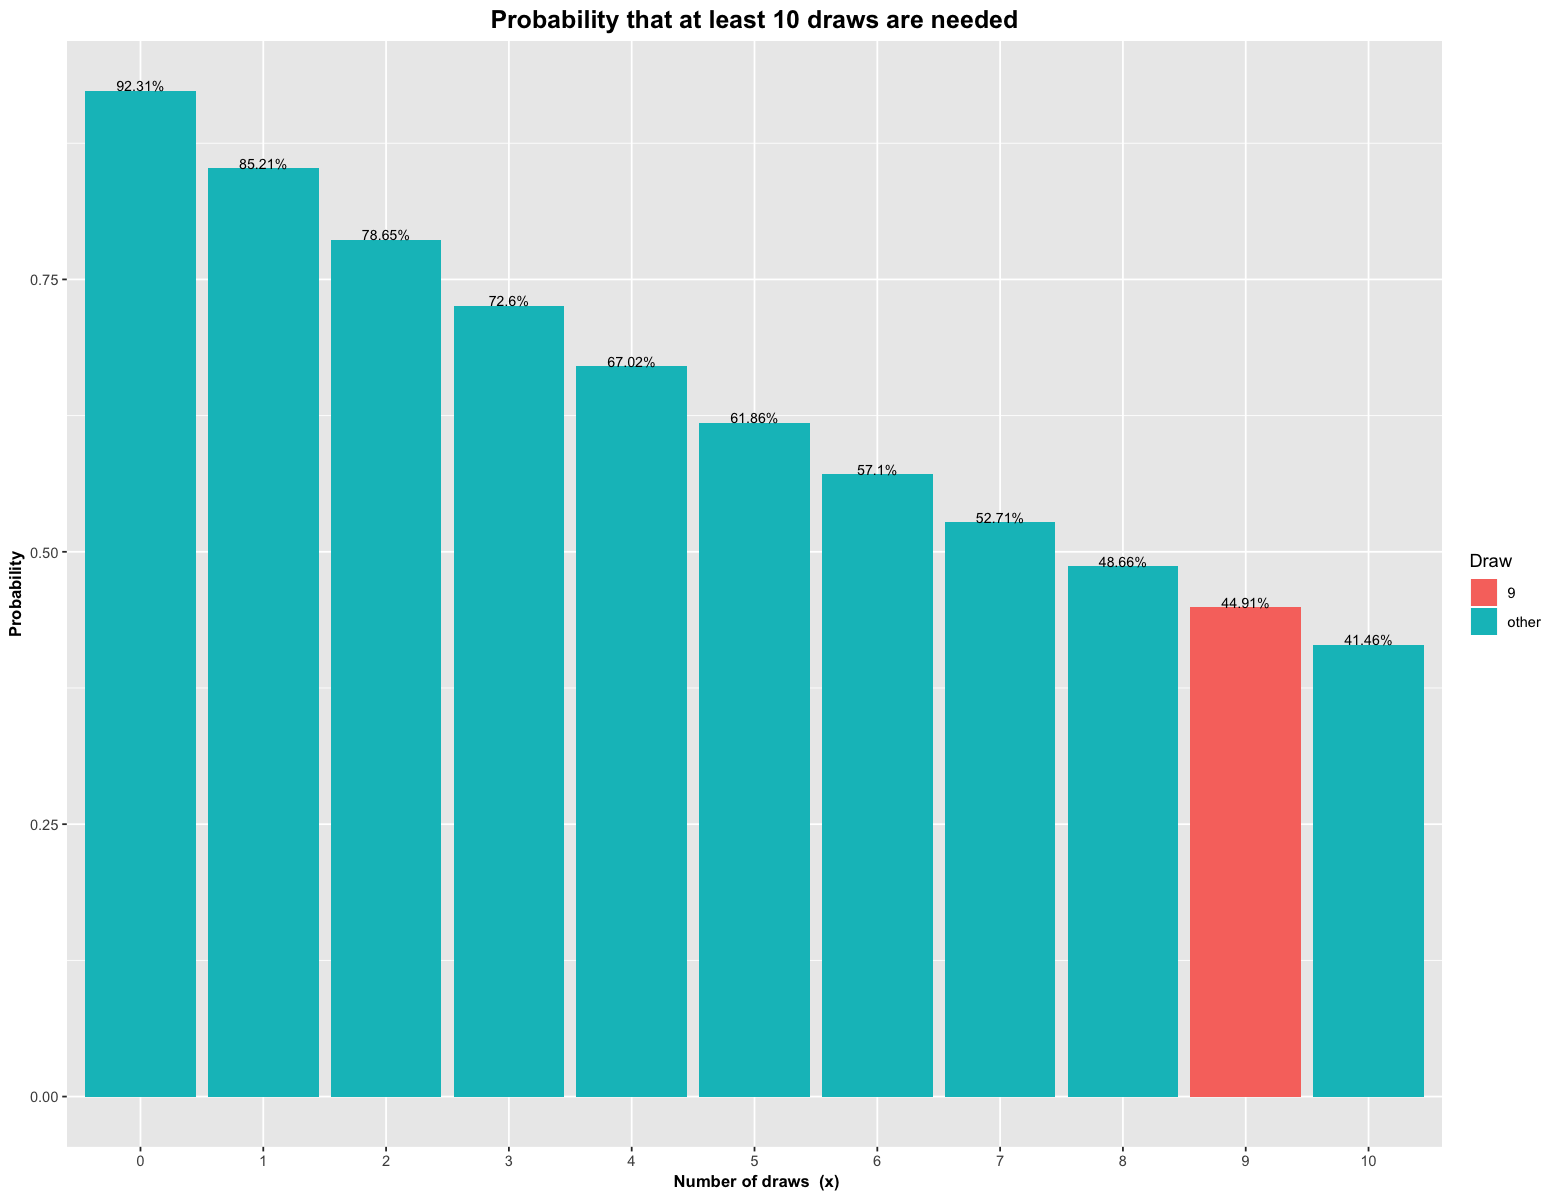

In [671]:

#dataframe with probability
data.frame(x = 0:10,
           prob = 1-pgeom(q = 0:10 ,prob = p)) %>%
           mutate(Draw = ifelse(x == n, n, "other")) %>%


#plotting it

ggplot(aes(x = factor(x),y = prob,fill = Draw)) + 
           geom_col() +
           geom_text(aes(label = paste0(round(prob*100,2), "%"),y = prob ),position = position_dodge(0.10),size = 3, vjust = 0)+ 
           theme(plot.title = element_text(size=15,hjust = 0.5,face="bold"))+ 
           theme(axis.title=element_text(size=10,face="bold"))+ 
           labs(title = "Probability that at least 10 draws are needed", x = " Number of draws  (x)",y = "Probability")

# EXERCISE 5

## The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form




### $$
\begin{align}
f(x)=  
\begin{cases}
c (t-1)(2-t)&\text{for $1<t<2$}\\
0&\text{otherwise}\\
\end{cases}
\end{align}
$$

## where t is the time in hours.




### 1) using the integrate() R function, determine the constant c 


We have a density function in an interval and we know that : $$c=\frac{1}{\int_1^2(t-1)(2-t)dt}$$ so we can compute the integral at denominator and then c by inverting the formula.

In [672]:
#define the function
ft<- function(t) ((t-1)*(2-t))
    
#integrate it
integral<- integrate(ft,lower=1,upper=2)  

#print first element of list and second one to know the abs error
 print(paste0("the value of the integrate without c is: ", integral [1])) 
 print(paste0("the absolute error < of the integration without c is: ", " ", "<", integral [2]))

[1] "the value of the integrate without c is: 0.166666666666667"
[1] "the absolute error < of the integration without c is:  <1.85037170770859e-15"


### the constant c is:

In [673]:
#knowing that the probability must be equal to 1
c<-1/integrate(ft,lower=1,upper=2)$value

print(paste0("the value of costant with integrate() function  is: ",  c))

[1] "the value of costant with integrate() function  is: 6"


## 2) write the set of four R functions and plot the pdf and cdf, respectively


### Pdf

In [674]:
Pdf <- function(x)
{
    return(ifelse(1<x&x<2,6*(x-1)*(2-x),0))
}

### Cdf

In [675]:
Cdf <- function(x){
    
    return(ifelse(1<x&x<2,6*(x^2-2*x-x^3/3+x^2/2+5/6), ifelse(x<=1,0,1)))
}

### Quantile function

In [676]:
quantile_f <- function(q){
    return(ifelse(q>0&q<1,
                  
                  uniroot(function(x){Cdf(x)-q},lower=1,upper=2)$root,
                  
                    "invalid value"))
    }

print(quantile_f(0.3))
print(quantile_f(5))

[1] 1.363283
[1] "invalid value"


### Random function

In [514]:
##CHIEDERE CONFRONTO

rf1 <- function(n) {
    return(quantile_f(runif(n)))
}
#check it
runif.2(1)


[1] 1.097421

### Plot Cdf and Pdf

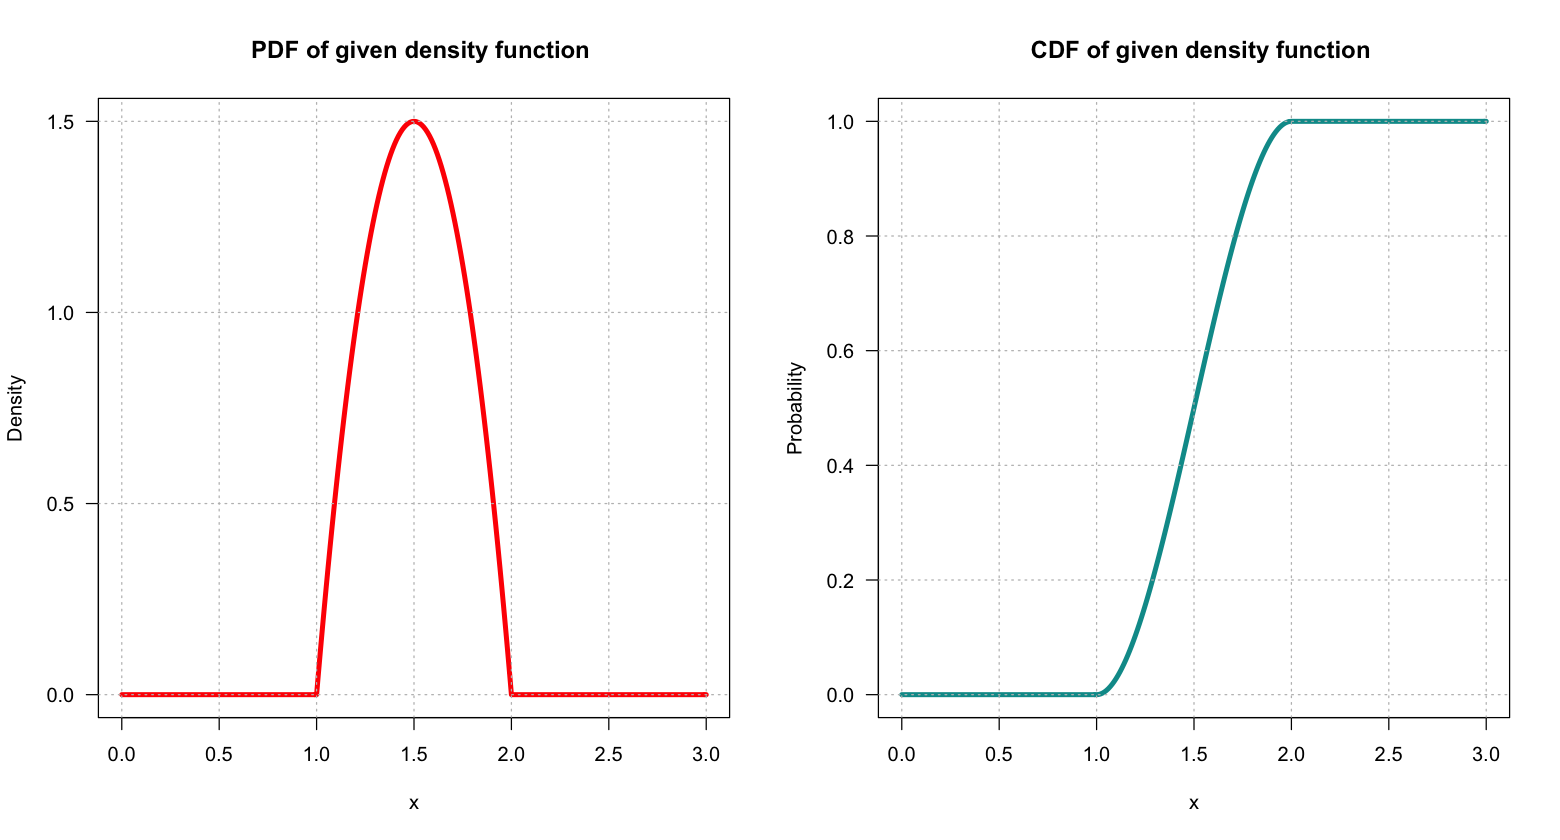

In [677]:
options(repr.plot.width=13, repr.plot.height=7)

par(mfrow=c(1,2))

#plot pdf 
x<-seq(0,3,0.01)
y<-Pdf(x)
        
plot(x,y,
     col="red",
     type="l",
     lwd=4,
     xlab=" x ",ylab="Density", las=1, 
     main="  PDF of given density function")

#grid
grid(nx=NULL, ny=NULL, lty=3, col="gray",lwd=1) 



#plot cdf 
y1<-Cdf(x)

plot(x,y1,
     col="#009999",
     type="l",
     lwd=4,
     xlab=" x ",
     ylab="Probability",
     las=1,
     main="  CDF of given density function")


#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

### Plot Cdf vs Pdf

It' s good to underline that PDF and CDF have two differents y-axises that's why I plotted PDF vs CDF with 2 differents y-axises. In particular on the left there's CDF's y-axis while on the right there's PDF's y-axis. If you don't underline this difference the plot CDF VS PDF wouldn't make any sense.

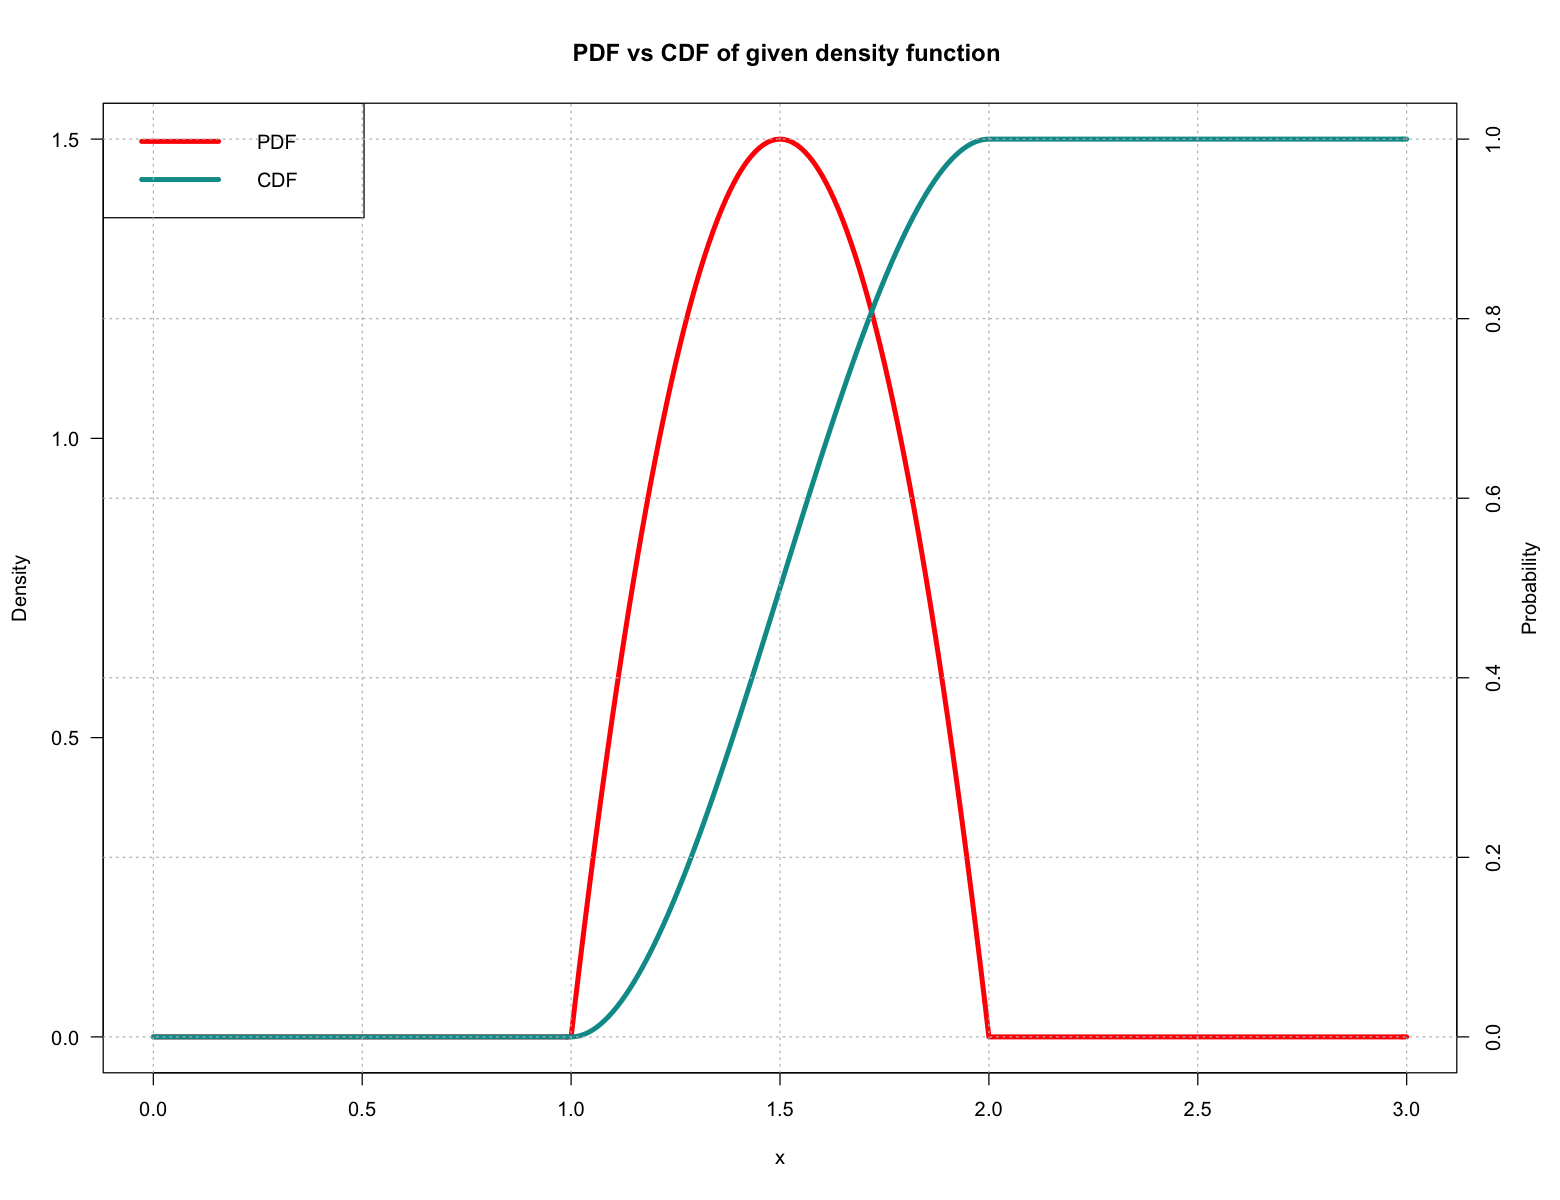

In [678]:
#plot Cdf vs Pdf 
options(repr.plot.width=13, repr.plot.height=10)

par(mar= c(5,4,4,4)+0.3)

plot(x,y,
     type="l",
     col="red", 
     las=1,
     lwd=4,
     xlab="x",
     ylab="",
     main="  PDF vs CDF of given density function")

par(new=TRUE)

plot(x,y1,
     type="l", 
     col="#009999", 
     las=1,
     lwd=4,
     axes=FALSE,
     xlab=" ",
     ylab="Density")



axis(side=4,at=pretty(range(y1)))
mtext("Probability",side=4,line=2.5)

#legend
legend(x = "topleft",
       col = c("red", "#009999"),
       lty = 1,
       lwd = 4,
       legend = c('PDF', 'CDF')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 3) Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

#### more than 75 minutes

In [679]:
#define the function
ft<- function(t) (6*(t-1)*(2-t))
    
#integrate it for >75 minut=5/4h
integral<- integrate(ft,lower=5/4,upper=2)  
int1<-integral[1] 
int1<-lapply(int1,round,4)

print(paste0("the probability that the student will finish the aptitude test in more than 75 minutes is:", " ", lapply(int1,"*",100) ,"%"))

[1] "the probability that the student will finish the aptitude test in more than 75 minutes is: 84.37%"


#### more than 90 minutes

We can interpret the question in 2 ways: the first one is that the student will finish in more than 90 minutes, the second one is in exact 90 minutes.
We have a continuous distribution of probability so the probability for one point is equal to 0 that means that the probability that the student will finish in exact 90 minutes is 0% 

In [680]:
#integrate it for >90 minut=3/2h
integral<- integrate(ft,lower=90/60,upper=2)  
int1<-integral[1] 
int1<-lapply(int1,round,4)

print(paste0("the probability that the student will finish the aptitude test in more than 90 minutes is:", " ", lapply(int1,"*",100) ,"%"))

[1] "the probability that the student will finish the aptitude test in more than 90 minutes is: 50%"


#### more than 120 minutes

Also in this case we can interpret the question in 2 ways: the first one is that the student will finish in more than 120 minutes, the second one is in exact 120 minutes.
We have a continuous distribution of probability so the probability for one point is equal to 0 that means that the probability that the student will finish in exact 120 minutes is 0%.
Furthermore it will be 0% for the first case as-well because the function for t>2=120 minutes is equal to 0.
By the way let's demonstrate it with a code.

In [681]:
#integrate it for >120 minut=2h
integral<- integrate(ft,lower=120/60,upper=2)  
int1<-integral[1] 
int1<-lapply(int1,round,4)

print(paste0("the probability that the student will finish the aptitude test in more than 120 minutes is:", " ", lapply(int1,"*",100) ,"%"))

[1] "the probability that the student will finish the aptitude test in more than 120 minutes is: 0%"


# EXERCISE 6

## the lifetime of tires sold by an used tires shop is  $10^{4 }$ · $x$ km, where $x$ is a random variable following the distribution function

### $$
\begin{align}
f(x)=  
\begin{cases}
\frac{2}{x^2}&\text{for $1<x<2$}\\
0&\text{otherwise}\\
\end{cases}
\end{align}
$$

 ## 1)write the set of four R functions and plot the pdf and cdf, respectively


### Pdf

In [682]:
pdf <- function(x)
{
    return(ifelse(1<x&x<2,2/x^2,0.))
}

### Cdf

In [651]:
cdf <- function(x){
    
    return(ifelse(1<x&x<2,-2/x+2, ifelse(x<=1,0,1)))
}

### Quantile function

In [652]:
quantile_f <- function(q){
    
    return(ifelse(q>0&q<1,2/(2-q),"invalid value"))
    }

print(quantile_f(0.75))
print(quantile_f(5))

[1] 1.6
[1] "invalid value"


### Random function

In [653]:
random_function <- function(n) {
    return(quantile_f(runif(n)))
}

### Plot Cdf and Pdf

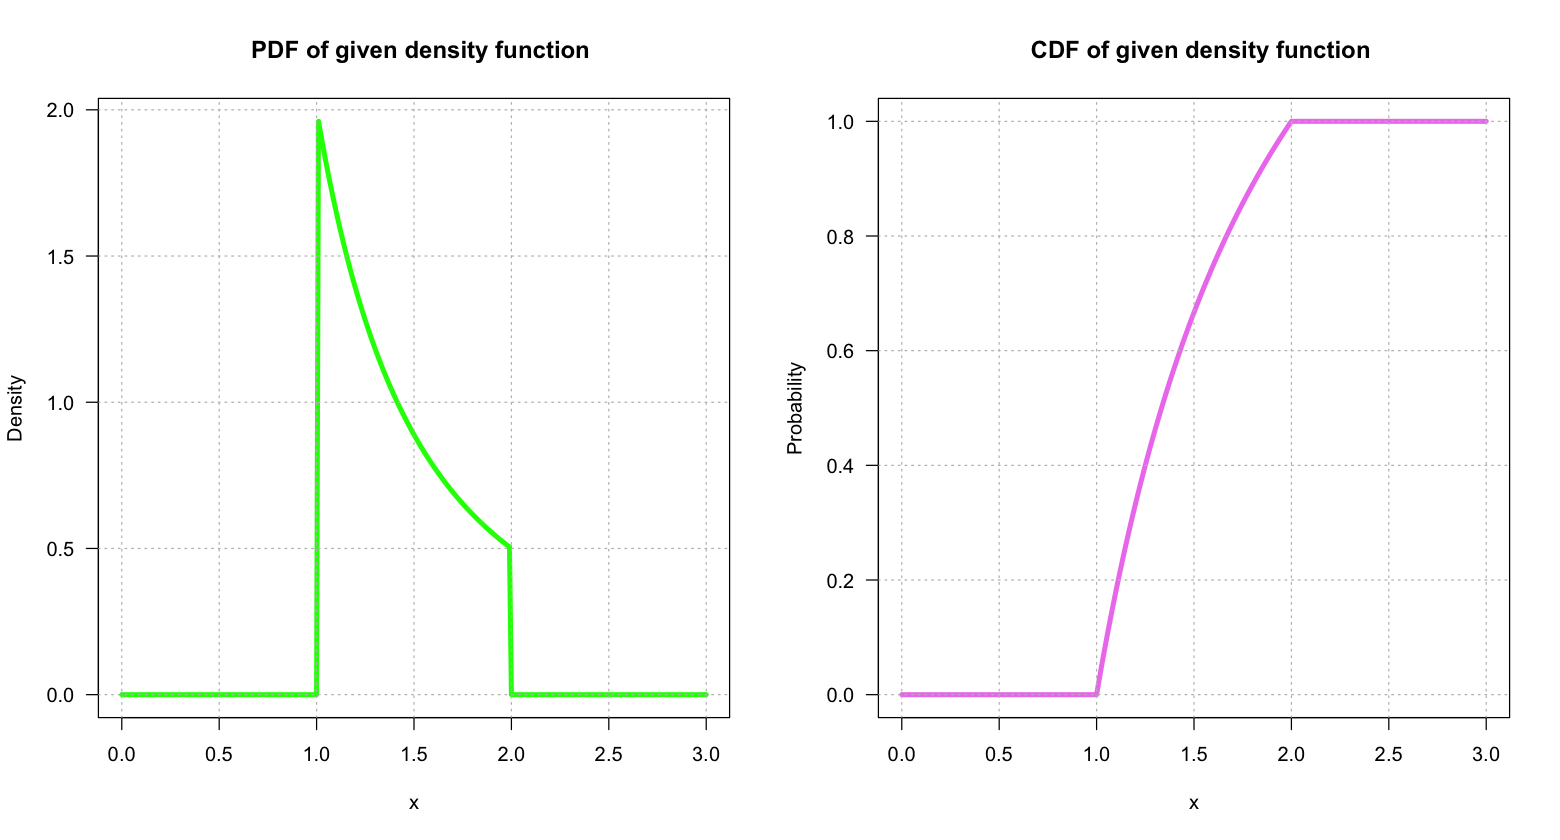

In [655]:
options(repr.plot.width=13, repr.plot.height=7)

par(mfrow=c(1,2))

#plot pdf 
x<-seq(0,3,0.01)
y<-pdf(x)
        
plot (x,y,
      type="l",
      col="green", 
      xlab=" x ",
      ylab="Density",
      las=1,
      lwd=4,
      main="  PDF of given density function")

#grid
grid(nx=NULL, ny=NULL, lty=3, col="gray",lwd=1) 


#plot Cdf 
y1<-cdf(x)

plot(x,y1,
     type="l", 
     col="violet", 
     xlab=" x ",
     ylab="Probability",
     las=1,
     lwd=4,
     main="  CDF of given density function")

#grid
 grid(nx=NULL,
      ny=NULL,
      lty=3,
      col="gray",
      lwd=1) 

### Plot Cdf vs Pdf

It' s good to underline that PDF and CDF have two differents y-axises that's why I plotted PDF vs CDF with 2 differents y-axises. In particular on the left there's CDF's y-axis while on the right there's PDF's y-axis. If you don't underline this difference the plot CDF VS PDF wouldn't make any sense.

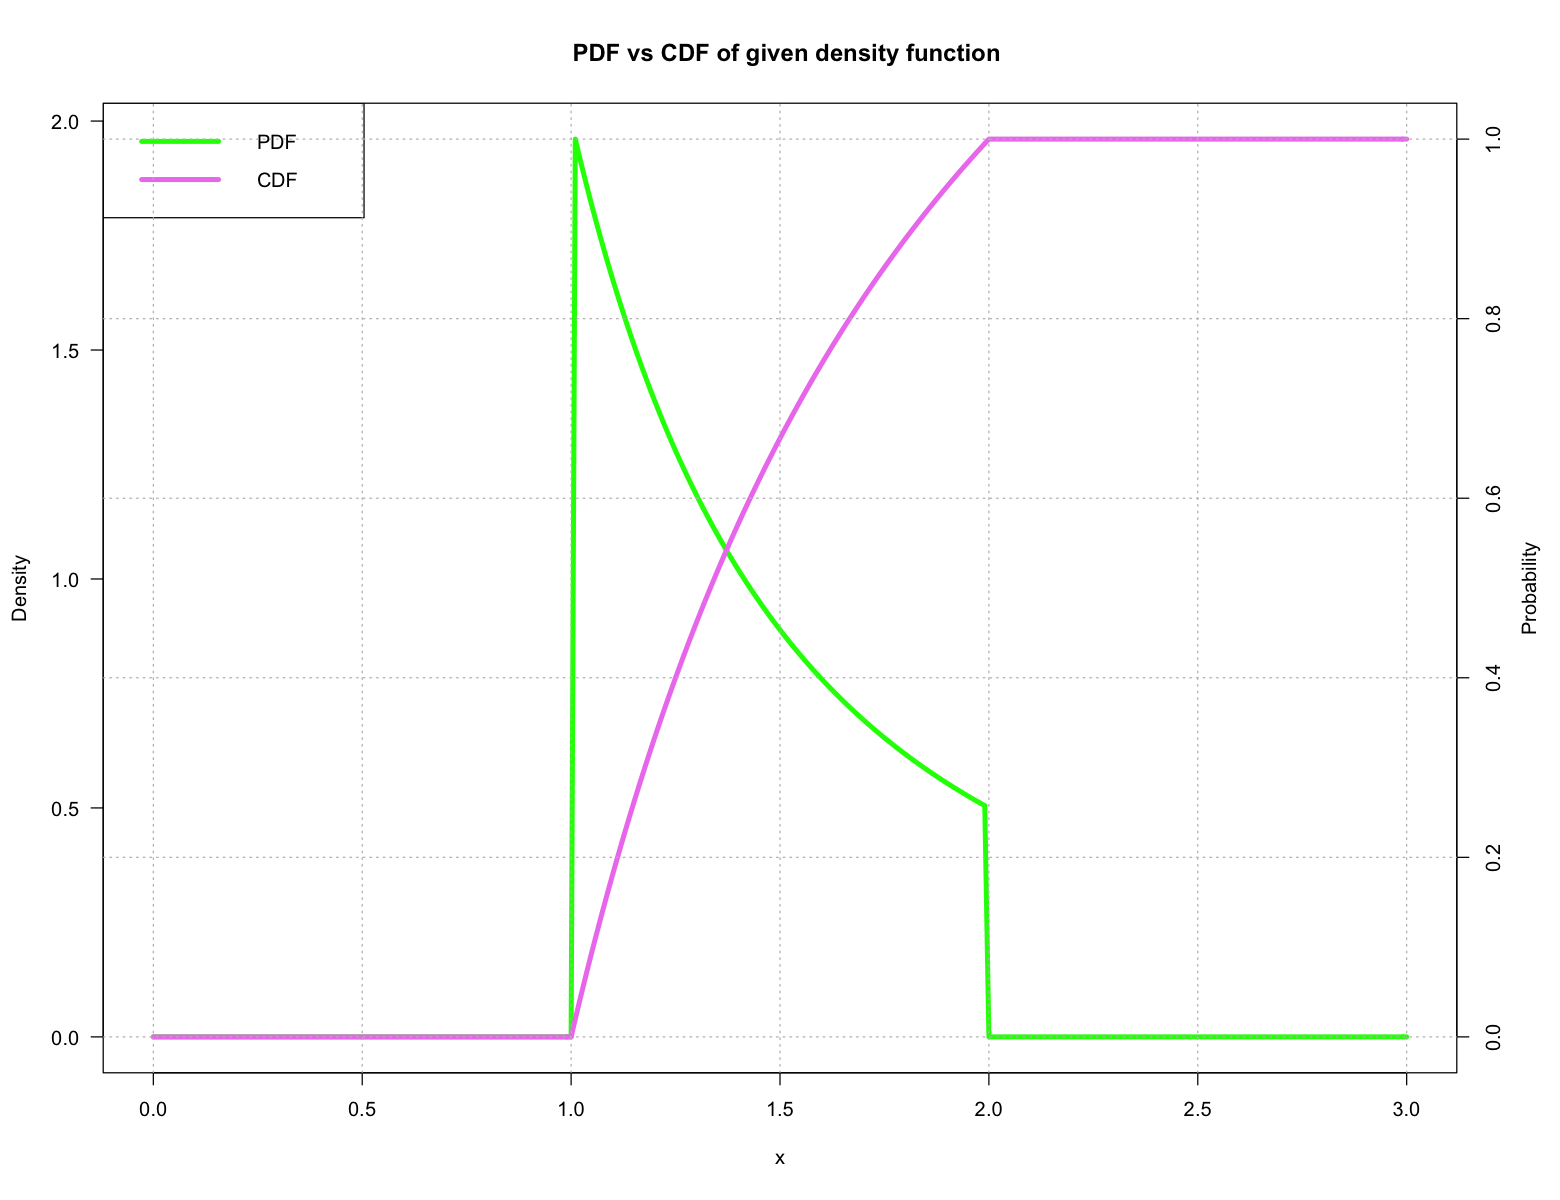

In [656]:
 
#plot Cdf vs Pdf 
options(repr.plot.width=13, repr.plot.height=10)

par(mar= c(5,4,4,4)+0.3)

plot(x,y,
     type="l",
     col="green", 
     las=1,
     lwd=4,
     xlab="x",
     ylab="",
     main="  PDF vs CDF of given density function")

par(new=TRUE)

plot(x,y1,
     type="l", 
     col="violet", 
     las=1,
     lwd=4,
     axes=FALSE,
     xlab=" ",
     ylab="Density",)



axis(side=4,at=pretty(range(y1)))
mtext("Probability",side=4,line=2.5)

#legend
legend(x = "topleft",
       col = c("green", "violet"),
       lty = 1,
       lwd = 4,
       legend = c('PDF', 'CDF')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 2) Determine the probability that tires will last less than 15000 km

In [657]:
#define the function
fx<- function(x) (2/((x)^2))
    
#integrate it for <15000 km
integral<- integrate(fx,lower=1,upper=1.5)  
int1<-integral[1] 
int1<-lapply(int1,round,4) #round it

print(paste0("the probability that that tires will last less than 15000 km is:", " ", lapply(int1,"*",100) ,"%"))

[1] "the probability that that tires will last less than 15000 km is: 66.67%"


## 3)Sample 3000 random variables from the distribution and determine the mean and the variance using the expression   $Var(x)=E[x^2]-E[x]^2$   

[1] "the mean for 3000 random variables is: 13887 km"
[1] "the variance for 3000 random variables is: 796 km"


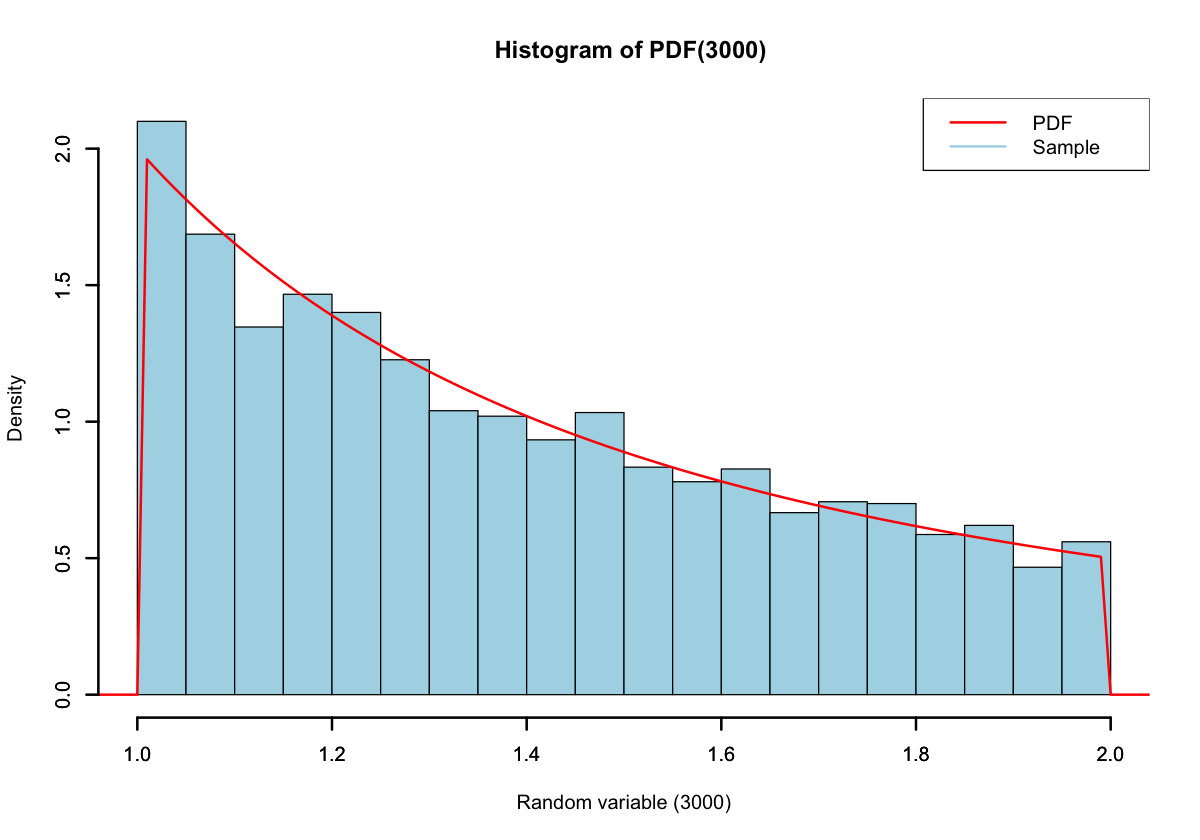

In [661]:
#number of variables
n=3000

#vector with variables
df<-(random_function(n))

#dataframe with variables
df2<- data_frame(ran=df)

#power of dataframe element to compute variance
df_power<-'^' (df2$ran,2)

#vector with var
var<- mean(df_power)-mean(df)^2

print(paste0("the mean for 3000 random variables is:", " ", round(mean(df)*10000,0)," ","km"))
print(paste0("the variance for 3000 random variables is:", " ", round(var*10000,0)," ","km"))





# plot histogram for random sample


options(repr.plot.width=10, repr.plot.height=7)

hist(df,
     freq = FALSE,
     breaks=30,
     col="lightblue",
     xlab=" Random variable (3000) ",
     ylab="Density", 
     main="  Histogram of PDF(3000)")


# pdf
lines(x,y,
      type="l",
      col="red", 
      las=1,
      lwd=2,)

axis(side=1,lwd=2)
axis(side=2,lwd=2)

#legend
legend(x = "topright",
       col = c("red","lightblue"),
       lty = 1,
       lwd = 2,
       legend = c('PDF',"Sample")) 

